## Data Cleaning and Shape Examining 


In [99]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english')

training_data = pd.read_csv("train.csv", encoding="ISO-8859-1")
testing_data = pd.read_csv("test.csv", encoding="ISO-8859-1")
attribute_data = pd.read_csv('attributes.csv')
descriptions = pd.read_csv('product_descriptions.csv')

training_data = pd.merge(training_data, descriptions, 
                         on="product_uid", how="left")

In [42]:
training_data.shape

(74067, 6)

As in the dataset page has mentioned that it might contains some embedded html tags, let's plot and see how many in percentage, more prececily the fields 'product_description'

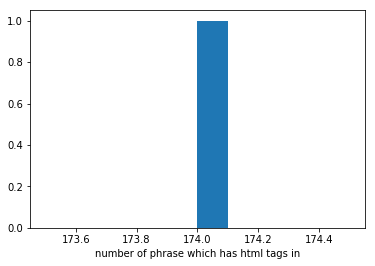

has html tags in  174
doesn't have html tags in  124254


In [43]:
%matplotlib inline
total_length = len(descriptions['product_description'] )
has_tag = sum([1 for _ in descriptions['product_description'] if '<br' in _])
no_tags = total_length - has_tag

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.hist(x=[has_tag])
ax.ticklabel_format(useOffset=False)
_ = plt.xlabel('number of phrase which has html tags in')

plt.show()
print('has html tags in ',has_tag)
print('doesn\'t have html tags in ', no_tags)


Now let's see what is the frequency of search query which include digits in it with respect to product_title which 
includes words. As you can see most of them includes digits in search bar. 


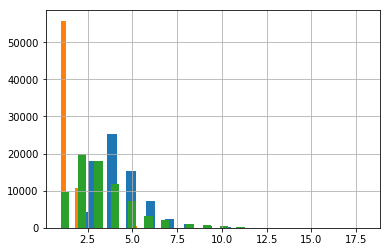

In [44]:
(training_data.search_term.str.count("\\w+") + 1).hist(bins=30) #plot number of words in search therms
(training_data.search_term.str.count("\\d+") + 1).hist(bins=30) #plot number of digits in search terms
(training_data.product_title.str.count("\\d+") + 1).hist(bins=30)#plot number of digits in title






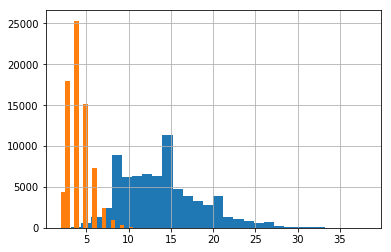

In [45]:
(training_data.product_title.str.count("\\w+") + 1).hist(bins=30)#plot number of words in title
(training_data.search_term.str.count("\\w+") + 1).hist(bins=30) #plot number of words in search query





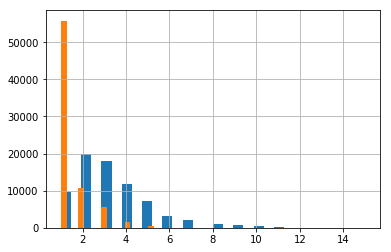

In [46]:
(training_data.product_title.str.count("\\d+") + 1).hist(bins=30)#plot number of words in title
(training_data.search_term.str.count("\\d+") + 1).hist(bins=30) #plot number of words in search query






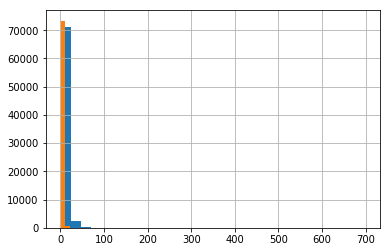

In [47]:
(training_data.product_description.str.count("\\d+") + 1).hist(bins=30)
(training_data.product_description.str.count("\\d+\W+\d+") + 1).hist(bins=30)



lets assume that there are zero response for null query search term

In [107]:
training_data[training_data.search_term.str.count('\\w+') < 1]
# training_data[training_data.search_term.str.contains('^\d+') < 1]

,id,product_uid,product_title,search_term,relevance,product_description


In [101]:
# an interest case can be see below, unfortunattly we cannot get rid of this element since it will make a bad impact on model
training_data[orign.product_uid==100030]

,id,product_uid,product_title,search_term,relevance,product_description
44,164,100030,9.1 in. x 5.8 in. White Designer Shelf Bracket,8 4616809045 9,1.67,White Designer Shelf Brackets offer a stylish ...
45,165,100030,9.1 in. x 5.8 in. White Designer Shelf Bracket,shelf bracket,3.00,White Designer Shelf Brackets offer a stylish ...
46,166,100030,9.1 in. x 5.8 in. White Designer Shelf Bracket,white 4shelves,1.67,White Designer Shelf Brackets offer a stylish ...


In [30]:
training_data[training_data.product_description.str.contains('^\d+')].head(4) # at first it looks like nothing unsual 


,id,product_uid,product_title,search_term,relevance,product_description
285,902,100151,Commercial Electric 7 in. White LED Easy Light...,closet light fixture,3.0,7 in. LED Easy Utility Light. Fastest and easi...
346,1121,100193,Main Door 36 in. x 80 in. Rustic Mahogany Type...,80 x 36 solid wood,3.0,36 in. x 80 in. wood mahogany prehung 2-panel ...
347,1128,100193,Main Door 36 in. x 80 in. Rustic Mahogany Type...,front door,3.0,36 in. x 80 in. wood mahogany prehung 2-panel ...
348,1129,100193,Main Door 36 in. x 80 in. Rustic Mahogany Type...,front doors,3.0,36 in. x 80 in. wood mahogany prehung 2-panel ...


Unfortunately it is kind ambiguous to figure out the meaning of digits in the search context like an example below, it can mean anything. we should take care of this when cleaning context. It looks that most of the case the meaning of X is denoted the unit of measure like fit/inch/or something by something

In [63]:
training_data[training_data.search_term.str.contains("^\\d+ . \\d+$")].head(4)

,id,product_uid,product_title,search_term,relevance,product_description
3377,10452,101800,Kaleen Habitat Bahama Rose Paprika 4 ft. x 6 f...,4 x 6,2.00,Habitat Bahama Rose Paprika 4 ft. x 6 ft. Area...
3650,11307,101959,Pressure-Treated Timber #2 Southern Yellow Pin...,4 x 6,1.67,This sturdy Pressure-Treated Timber #2 Souther...
3766,11705,102041,Kaleen Habitat Calypso Azure 4 ft. x 6 ft. Ind...,4 x 6,3.00,Habitat Calypso Azure 4 ft. x 6 ft. Area Rug i...
4513,14166,102472,Safavieh Lyndhurst Sage/Ivory 4 ft. x 6 ft. Ar...,4 x 6,1.33,Safavieh's Lyndhurst collection offers the bea...
7247,22691,104370,Wilsonart 48 in. x 96 in. Laminate Sheet in Mo...,48 x 96,2.33,Wilsonart's 48 in. x 96 in. Montana Walnut Lam...
7485,23405,104575,Yosemite Home Decor Undermount Stainless Steel...,23 x 38,2.33,These high quality Yosemite sinks are a heavy ...
13639,42190,110172,Sigman 20 ft. x 20 ft. Blue Tarp,20 x 20,2.67,All-purpose blue poly tarps are widely used fo...
15523,47882,112008,Wilsonart 48 in. x 96 in. Laminate Sheet in Su...,48 x 96,3.00,Wilsonart's 48 in. x 96 in. Summer Carnival La...
21335,65959,118174,1 in. Depth EZ Flow Heavy Duty (Case of 12),20 x 20,1.67,This is a standard grade furnace filter of the...
23618,72613,120571,Honeywell 1 in. Allergen Superior Pleated FPR ...,20 x 20,1.67,The Honeywell Superior Allergen is made of a r...


In order to apply any standard method for analysis we have to standarize metric for text fields, which we define as follows

- split into tokens by white space
- remove punctuation from each token
- remove remaining tokens that are not alphabetic
- filter out stop words
- filter out short tokens

In [81]:
from bs4 import BeautifulSoup
import lxml
import re
import nltk
from nltk.corpus import stopwords # Import the stop word list

from string import punctuation
from collections import Counter


def remove_html_tag(text):
    soup = BeautifulSoup(text, 'lxml')
    text = soup.get_text().replace('Click here to review our return policy for additional information regarding returns', '')
    return text

def str_stemmer(doc):
    # split into tokens by white space
    tokens = doc.split()
    # remove punctuation from each token
    table = str.maketrans('', '', punctuation)
    tokens = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return ' '.join(tokens)

def str_common_word(str1, str2):
    return sum(int(str2.find(word)>=0) for word in str1.split())

############### cleaning html tags ##################
has_tag_in = training_data.product_description.str.contains('<br')
training_data.loc[has_tag_in, 'product_description'] = training_data.loc[has_tag_in, 'product_description'].map(lambda x:remove_html_tag(x))
###############
orign = training_data.copy()

############## apply stemming #####################
training_data['search_term'] = training_data['search_term'].map(lambda x:str_stemmer(x))
training_data['product_title'] = training_data['product_title'].map(lambda x:str_stemmer(x))
training_data['product_description'] = training_data['product_description'].map(lambda x:str_stemmer(x))
############## end stemming #####################

############## building custome feature, let's build a few of them before compare which one is the best ###########
training_data['len_of_query'] = training_data['search_term'].map(lambda x:len(x.split())).astype(np.int64)
training_data['shared_words'] = training_data[['search_term','product_description', 'product_title']].apply(lambda row:sum([str_common_word(*row[:-1]), str_common_word(*row[1:])]), axis=1)

# training_data['frequency_digits_in_sq']=training_data.product_description.str.count("\\d+")
training_data['frequency_words_in_sq'] = training_data.product_description.str.count("\\w+")

training_data.head(3)



,id,product_uid,product_title,search_term,relevance,product_description,len_of_query,shared_words,frequency_words_in_sq
0,2,100001,Simpson StrongTie Angle,angle bracket,3.0,Not angles make joints stronger also provide c...,2,3,74
1,3,100001,Simpson StrongTie Angle,bracket,2.5,Not angles make joints stronger also provide c...,1,2,74
2,9,100002,BEHR Premium Textured DeckOver Tugboat Wood Co...,deck,3.0,BEHR Premium Textured DECKOVER innovative soli...,1,7,116


lets see if nothing wrong had have happened 

In [90]:
training_data[training_data.search_term.str.count('\\w+') < 1]

,id,product_uid,product_title,search_term,relevance,product_description,len_of_query,shared_words,frequency_words_in_sq
44,164,100030,White Designer Shelf Bracket,,1.67,White Designer Shelf Brackets offer stylish al...,0,3,51
97,347,100057,Owens Corning Kraft Faced Insulation Batts,,1.33,EcoTouch insulation reinvention fiberglass ins...,0,9,121
145,485,100074,Kaleen Soho Thames Beige ft ft Area Rug,,3.00,Soho Thames Beige ft ft Area Rug fun functiona...,0,8,79
636,2029,100361,ft Common Board,,1.00,Every piece meets highest grading standards st...,0,0,92
778,2465,100430,Plytanium Plywood Siding Panel IN OC Common ft...,,3.00,Plywood siding allwood exteriorgrade panel It ...,0,3,54
1173,3658,100637,Philips ft Daylight Linear LED Light Bulb,,3.00,Experience hasslefree energy savings simply re...,0,14,175
1279,3979,100695,Grade StakesPine Common ft Actual,,1.33,This ft Pine Grade Stakes used construction Th...,0,4,44
1548,4770,100828,Owens Corning Unfaced Insulation Continuous Ro...,,1.00,EcoTouch insulation reinvention fiberglass ins...,0,11,117
1657,5071,100885,Sheetrock UltraLight ft ft Gypsum Board,,2.00,Sheetrock Brand UltraLight ft ft Gypsum Board ...,0,6,70
1872,5752,100995,Simpson StrongTie Black PowderCoated EZ Base,,1.67,Replacing entire fence expensive difficult tas...,0,2,47


In [98]:
orign[orign.product_uid==100030]

,id,product_uid,product_title,search_term,relevance,product_description
44,164,100030,9.1 in. x 5.8 in. White Designer Shelf Bracket,8 4616809045 9,1.67,White Designer Shelf Brackets offer a stylish ...
45,165,100030,9.1 in. x 5.8 in. White Designer Shelf Bracket,shelf bracket,3.00,White Designer Shelf Brackets offer a stylish ...
46,166,100030,9.1 in. x 5.8 in. White Designer Shelf Bracket,white 4shelves,1.67,White Designer Shelf Brackets offer a stylish ...


In [84]:
training_data[training_data.search_term.str.count('\\w+') < 1]

,id,product_uid,product_title,search_term,relevance,product_description,len_of_query,shared_words,frequency_words_in_sq
44,164,100030,White Designer Shelf Bracket,,1.67,White Designer Shelf Brackets offer stylish al...,0,3,51
97,347,100057,Owens Corning Kraft Faced Insulation Batts,,1.33,EcoTouch insulation reinvention fiberglass ins...,0,9,121
145,485,100074,Kaleen Soho Thames Beige ft ft Area Rug,,3.00,Soho Thames Beige ft ft Area Rug fun functiona...,0,8,79
636,2029,100361,ft Common Board,,1.00,Every piece meets highest grading standards st...,0,0,92
778,2465,100430,Plytanium Plywood Siding Panel IN OC Common ft...,,3.00,Plywood siding allwood exteriorgrade panel It ...,0,3,54
1173,3658,100637,Philips ft Daylight Linear LED Light Bulb,,3.00,Experience hasslefree energy savings simply re...,0,14,175
1279,3979,100695,Grade StakesPine Common ft Actual,,1.33,This ft Pine Grade Stakes used construction Th...,0,4,44
1548,4770,100828,Owens Corning Unfaced Insulation Continuous Ro...,,1.00,EcoTouch insulation reinvention fiberglass ins...,0,11,117
1657,5071,100885,Sheetrock UltraLight ft ft Gypsum Board,,2.00,Sheetrock Brand UltraLight ft ft Gypsum Board ...,0,6,70
1872,5752,100995,Simpson StrongTie Black PowderCoated EZ Base,,1.67,Replacing entire fence expensive difficult tas...,0,2,47
